In [1]:
from free_lie_algebra import *
import numpy as np
from esig import tosig
import iisignature
from IPython.display import Image

# Introduction

#### A Lie Algebra of a commutative ring K is a K-module $\mathcal{L}$ together with a K-bilinear mapping called Lie-bracket satisfying $[x, x] = 0$ and the Jacobi identity. 

## Theorem:

#### Let $\mathcal{L}$ be a Lie algebra over K. There exists an associative algebra $\mathcal{A}_0$ over K and a Lie algebra homomrphism $\phi_0: \mathcal{L} \ \rightarrow \mathcal{A}_0$ having the following property: for any associative algebra $\mathcal{A}$ and any Lie algebra homomorphism $\phi: \mathcal{L} \ \rightarrow \mathcal{A}$ there exists a unique algebra homomorphism $f: \mathcal{A}_0 \ \rightarrow \mathcal{A}$ making the following diagram commute.

#### The algebra $\mathcal{A}_0$ is called the enveloping algebra of $\mathcal{L}$.

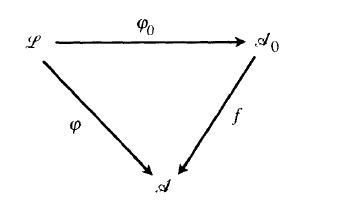

In [13]:
Image('figure1.PNG')

## Poincare-Birkhoff-Witt theorem:

#### If $(x_i)$ is a totally ordered basis of the free Lie algebra $\mathcal{L}$ and $\mathcal{A}_0$ is its enveloping algebra, and $\phi_0: \mathcal{L} \ \rightarrow \mathcal{A}_0$ is the nature Lie algebra homomorphism defined above, then $\mathcal{A}_0$ has as basis the set of decreasing products $\phi_0(x_{i_1})...\phi_0(x_{i_n})$, as a free K-module. 

## Definition of free Lie algebra

#### $\mathcal{L}_0$ is called a free Lie algebra on a set A (and a mapping $i: A \ \rightarrow \mathcal{L}_0$ if for any other Lie algebra $\mathcal{L}$ and mapping $f: A \ \rightarrow \mathcal{L}$ there is a unique Lie algebra homomorphism $\bar{f}: \mathcal{L}_0 \ \rightarrow \mathcal{L}$ such that the diagram below commutes

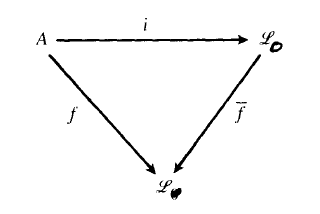

In [14]:
Image('figure2.PNG')

# Chapter 1: Lie Polynomials

## 1.1 Words, Polynomials and Series

#### The set of all words over the alphabet A gives rise to a monoid called the free monoid $A^*$. The neutral element is the empty word, denoted $1$.

#### Let $K$ be a commutative ring with unit. A non-commutative polynomial on A over K is a linear combination over K of words on A. We write a general polynomial as:

$$P = \sum_{w \in A^*}(P,w)w$$

#### The set of all polynomials is denoted $K<A>$. It has a K-algebra structure with addition (+) being componentwise and the concatenation product defined as 

$$(PQ, w) = \sum_{w=uv}(P,u)(Q,v) \ \ \ \ (concatenation \ \ product)$$

In [11]:
# define 2 words
p = Word("121")
q = Word("13")

# convert them to elements of the tensor algebra
P = word2Elt(a)
Q = word2Elt(b)

# concatenation product
concatenationProduct(P, Q)

E[{}, {}, {}, {}, {}, {12113: 1}]

#### A polynomial P is homogeneous of degree n if P is a linear combination of words of length n. A polynomial P is said finely homogeneous if P is a linear combination of words having all the same partial degree with respect of all letters, where we define the partial degree of P with respect to the letter a as follows:

$$deg_a(P) = sup\{|w|_a, w \in A^*, (P,w)\neq 0\}$$

#### and $|w|_a$ is the number of occurencies of the letter a in the word w

#### A formal Lie series on A over K is an infinite formal linear combination 

$$S = \sum_{w \in A^*}(S,w)w$$

#### The set of all setries is denoted $K<<A>>$. It also has a K-algebra structure with concatenation product.

## Important remark

#### There is a natural duality between $K<A>$ and $K<<A>>$. Indeed, if one defines the pairing

$$K<<A>> \ \ \times \ \ \ K<A> \ \ \rightarrow \ \ K$$
$$(S,P) \ \ \rightarrow \ \ (S,P) = \sum_{w \in A^*}(S,w)(P,w)$$

#### This is sum is indeed finite because P is a polynomial. So $K<<A>>$ is the dual space of $K<A>$. When we restrict $K<<A>>$ to $K<A>$ then this pairing simply gives a scalar product on $K<A>$ with $A^*$ being an orthonormal basis.

## 1.2 Lie Polynomials

#### We define the Lie bracket of 2 polynomials in $K<A>$ as follows:

$$[P,Q] = PQ - QP$$

In [12]:
lieProduct(P, Q)

E[{}, {}, {}, {}, {}, {12113: 1, 13121: -1}]

#### A Lie polynomial is an element of the smallest submodule of $K<A>$ containing A anc closed under Lie brackets. It is also the free Lie algebra on A, denoted by $L(A)$. Moreover $K<A>$ is the enveloping algebra of $L(A)$. 

## 1.3 Characterization of Lie Polynomials

### $\delta$ (homomorphism of K-algebras)

$$\delta : K<A> \ \ \rightarrow \ \ K<A> \otimes_K \ K<A>$$

$$\delta(a) = a \otimes 1  + 1 \otimes a$$

In [13]:
a = word2Elt("31")
delta(a)

EE{(31, ): 1, (3, 1): 1, (1, 3): 1, (, 31): 1}

### $\alpha$     (the anti-automorphism of $K<A>$ which sends each letter a to -a).

#### It is defined as the following linear mapping on $K<A>$ into itself:

If $w = a_1...a_n$, then

$$\alpha(w) = (-1)^na_n...a_1$$

In [15]:
w = word2Elt(Word("1213"))

alpha(w)

E[{}, {}, {}, {}, {3121: 1}]

### In particular:

$$\alpha(PQ) = \alpha(Q)\alpha(P)$$

In [16]:
alpha(concatenationProduct(P,Q)) == concatenationProduct(alpha(Q), alpha(P))

True

### $\bar{\delta} = (id \ \otimes \ \alpha) \circ \delta$

### $ad(P)$

$$ad(P) : \ K<A> \ \rightarrow \ K<A>$$
$$ad(P)(Q) = [P,Q] = PQ - QP$$

### $Ad$

$$Ad: \ K<A> \ \rightarrow End(K<A>)$$

$$Ad(a) = ad(a)$$

### Remark: in general $ad \neq Ad$. 

Example $ad(12)(Q) \neq Ad(12)(Q)$

In [21]:
a = letter2Elt('1')
b = letter2Elt('2')

ad(concatenationProduct(a,b))(Q) == Ad(concatenationProduct(a,b))(Q)

False

### D (linear mapping $K<A> \ \rightarrow \ K<A>$ that sends each word $w$ of length n to $nw$)

### Important Remark: D is a derivation on $K<A>$, i.e. 

$$D(PQ) = D(P)Q + PD(Q)$$

In [23]:
D(concatenationProduct(P, Q)) == concatenationProduct(D(P), Q) + concatenationProduct(P, D(Q))

True

### r (Lie bracketing from right to left)

if $w = a_1...a_n$, then

$$r(w) = [a_1,...,[a_{n-1}, a_n]...]$$

## Theorem (p. 20)

### If P is a Lie polynomial, then the following are equivalent:

1) P is Lie

2) $ad(P) = Ad(P)$ and $(P, 1) = 0$

3) $\delta(P) = P\otimes1 + 1\otimes P$

4) $\bar{\delta}(P) = P \otimes 1 - 1 \otimes P$

5) $(P, 1) = 0$ and $r(P) = D(P)$

In [49]:
# define a random Lie polynomial
P = randomLieElt(2,4)

#2)
print('ad(P)(Q) - Ad(P)(Q) = {}'.format(ad(P)(Q) - Ad(P)(Q) ))

ad(P)(Q) - Ad(P)(Q) = E[{}, {}, {}, {}, {}, {}, {}]


In [51]:
#2)
print('(P,1) = {}'.format(get_coefficient(a=P, word=emptyWord)))

(P,1) = 0


In [55]:
#5)
r(P) == D(P)

True

### $\lambda$ and $conc$ (linear mappings $K<A> \ \otimes \ K<A> \rightarrow \ K<A>$)

$$\lambda(P \otimes Q) = D(P)Q$$

$$conc(P \otimes Q) = PQ$$

### Lemma 1.5: For any polynomial Q 

$$\lambda \circ \bar{\delta}(Q) = r(Q)$$

$$conc \circ \bar{\delta}(Q) = (Q, 1)$$

In [66]:
lambda_(deltabar(A)) == r(A)

True

### $\mu : \ K<A> \ \otimes \ K<A> \ \rightarrow \ End(K<A>)$  (linear)

$$\mu(P_1 \otimes P_2)(Q) = P_1QP_2$$

## Lemma 1.6

$$ad(P) = \mu(P\otimes1 - 1\otimes P)$$

$$Ad(P) = \mu \circ \bar{\delta}(P)$$

In [71]:
r1=randomElt(2,4)
r2=randomElt(2,4)

#check lemma 1.6(i)
distance(ad(r1)(r2),mu(tensorProduct(r1,unitElt)-tensorProduct(unitElt,r1))(r2))<1e-10

True

In [72]:
distance(Ad(r1)(r2),mu(deltabar(r1))(r2))<1e-10

True

## Lemma 1.7

for any Lie polynomial P

$$\alpha(P) = -P$$

In [74]:
P = randomLieElt(2,4)

distance(alpha(P), -P) < 1e-10

True

## 1.4 Shuffles

#### The shuffle product $\sqcup\sqcup$ is defined on words, but it can be extended to $K<A>$ and $K<<A>>$ by the formula:

$$S_1 \sqcup\sqcup ... \sqcup\sqcup S_p = \sum_{u_1,...,u_p}(S_1,u_1)...(S_p,u_p)u_1\sqcup\sqcup...\sqcup\sqcup u_p$$

#### This infinite sum makes sense because it is locally finite: indeed, for any word $w$, there are only finitely many p-tuples $(u_1,...,u_p)$ such that w is a shuffle of $u_1,...,u_p$.  

## Important remark:

### The shuffle product $\sqcup\sqcup$ is associative and clearly distributive wrt addition. Therefore on $K<A>$ and $K<<A>>$ we obtain a commutative algebra structure with the shuffle product, called the shuffle algebra.

### $\delta$ and $\sqcup\sqcup$ are related:

#### We define $\delta_p: \ K<<A>> \ \rightarrow \ K<A>^{\bar{\otimes}p}$ as follows:

$$delta_p(a) = a\otimes1\otimes...\otimes1 + 1\otimes a\otimes...\otimes1 + ... + 1\otimes1\otimes...\otimes a$$

## Proposition 1.8: for any series S

$$\delta_p(S) = \sum_{u_1,...,u_p \in A^*}(S,u_1\sqcup\sqcup...\sqcup\sqcup u_p)u_1 \otimes...\otimes u_p$$

#### recalling that the scalar product of a series S and a polynomial P is defined as 

$$(S,P) = \sum_{w\in A^*}(S,w)(P,w)$$

## 1.5 Duality Concatenation / Shuffle

#### Similar to the definition of the canonical scalar product on $K<A>$ (that makes $A^*$ an orthonormal basis), we can define a scalar product on $K<A>^{\otimes p}$ for which

$$\{u_1 \otimes ... \otimes u_p, u_1,...,u_p \in A^*\}$$

#### is an orthonormal basis

#### We will view the shuffle product as a linear mapping:

$$sh: K<A> \otimes \ K<A> \ \rightarrow \ K<A>$$

$$u \otimes v \ \rightarrow \ u \sqcup\sqcup v$$

####  Consider now the adjoint $sh^*$ for the above scalar product $sh$ defined as 

$$(sh(P \otimes Q), R) = (P \otimes Q, sh^*(R))$$

#### for any polynomials P, Q, R

### Theorem (p.27)

$$(sh(P \otimes Q), R) = (P \otimes Q, \delta(R))$$

#### in other words, $sh^* = \delta$

In [86]:
# define 3 polynomials
P = parse("12")
Q = lieProduct(letter2Elt(1),letter2Elt(2))
R = parse("[7]1221+[3]1212")

# write down left-hand-side of the equation above
lhs = dotprod(sh(tensorProduct(P,Q)),R)
lhs_ = dotprod(shuffleProduct(P,Q),R) # this 2 are equivalent

# write down rigth-hand-side of equation above
rhs = dot_EltElt(tensorProduct(P,Q),delta(R))

# check identity
lhs == rhs

True

### We obtain a similar result if we interchange concatenation ($conc$) and shuffle ($sh$):

#### Denoting $\delta^{'}$ as the adjoint of the concatenation product, viewed as a linear mapping:

$$conc: K<A> \otimes \ K<A> \ \rightarrow K<A>$$

$$u \otimes v \ \rightarrow \ uv$$

#### Thus $\delta^{'} = conc^*$ and for any P, Q, R:

$$(PQ,R) = (conc(P \otimes Q), R) = (P \otimes Q, conc^*(R)) = (P \otimes Q, \delta^{'}(R))$$

#### This implies that for any word w

$$\delta^{'}(w) = \sum_{u,v \in A^*}(u \otimes v, \delta^{'}(w))u \otimes v = \sum(uv,w)u \otimes v = \sum_{w=uv}u \otimes v$$

#### i.e. $\delta^{'}$ corresponds to all decompositions in two words with respect to the concatenation product

In [87]:
# write down left-hand-side of the equation above
lhs = dotprod(concatenationProduct(P,Q),R)
lhs_ = dotprod(conc(tensorProduct(P,Q)),R) # this 2 are equivalent

# write down rigth-hand-side of equation above
rhs = dot_EltElt(tensorProduct(P,Q),deltadash(R))

# check identity
lhs == rhs

True

#### Remark: similarly $\delta(w)$ corresponds to all decompositions in two words with respect to the shuffle product, with multiplicities

### Proposition 1.9: 

#### The adjoint $\delta = sh^*$ of the shuffle product is a homomorphism for the concatenation product. Whilst the adjoint $\delta^{'} = conc^*$ of the concatenation product is a homomorphism for the shuffle product. These two linear mappings are completely described as follows:

$$\delta(w) = \sum_{u,v \in A^*}(w, u\sqcup\sqcup v)u \otimes v$$
$$\delta^{'}(w) = \sum_{u,v \in A^*}(w, uv)u \otimes v$$

## Important Remark

### There are 2 bialgebra structures on $K<A>$: one with concatenation product and $\delta$ as coproduct, the other with the shuffle product and $\delta^{'}$ as coproduct

## P. 28-29 (Hopf Algebra structure)

#### We now define a different K-algebra structure on $End(K<A>)$. For $f, g \in End(K<A>)$ define

$$f \star g = conc \circ (f \otimes g) \circ \delta$$

#### In other words, for any polynomial P, we have:

$$(f \star g)(P) = \sum_{u,v \in A^*}(P,u \sqcup\sqcup v)f(u)g(v)$$

#### We call $\star$ convolution. Now define an associative algebra $\mathcal{A}$ as the complete tensor product:

$$\mathcal{A} = K<A> \bar{\otimes} \ K<A>$$

#### with the shuffle product on the left and the concatenation product on the right of $\otimes$. I.e. an element of $\mathcal{A}$ is defined by:

$$(\sum_{u,v}\alpha_{u,v}u \otimes v)(\sum_{x,y}\beta_{x,y}x \otimes y) = \sum_{u,v,x,y}(u\sqcup \sqcup x)\otimes (vy)$$

#### We note that each endomorphism $f \in End(K<A>)$ is completely described by its canonical image $\sum_{u \in A^*}u \otimes f(u)$ in $\mathcal{A}$. The identity endomorphism is mapped onto $\sum_{u}u \otimes u$.

### Proposition 1.10

#### Define $\epsilon(P) = (P,1) \in End(K<A>)$. With the convolution $\star$ and unit element $\epsilon$, $End(K<A>)$ acquires an associative algebra structure. The inverse in this algebra of the identity of $K<A>$ is $\alpha$. The canonical embedding

$$End(K<A>) \rightarrow \ \mathcal{A}$$

$$f \rightarrow \ \sum_{u}u \otimes f(u)$$

#### is an algebra homomorphism for the convolution product. In other words:

$$\sum_{w}w \otimes ((f \star g)(w)) = (\sum_{u}u \otimes f(u))(\sum_v v \otimes g(v))$$

#### where the product is taken in $\mathcal{A}$ (shuffle on the left of $\otimes$, concatenation on the right)

#### This implies that $K<A>$ has an $Hopf$-algebra structure, with concatenation as product, $\delta$ as coproduct, and $\alpha$ as antipode.

## Link with Signatures:

#### If $X$ is the truncated signature of a path, then $\alpha(X)$ is the one for the reversed path.

## P. 31

#### We can extend the definition of convolution $\star$ given above. Let's denote $\delta_p$ the concatenation homomorphism:

$$\delta_p: K<A> \rightarrow K<A>^{\otimes p}$$

#### such that for any letter a:

$$\delta_p(a) = (a \otimes 1 \otimes ... \otimes 1) + (1 \otimes a \otimes ... \otimes 1) + ... + (1 \otimes 1 \otimes ... \otimes a)$$

### Theorem:

#### If P is a Lie polynomial, then

$$\delta_p(P) = (P \otimes 1 \otimes ... \otimes 1) + (1 \otimes P \otimes ... \otimes 1) + ... + (1 \otimes 1 \otimes ... \otimes P)$$

#### Furthermore, for any endomorphisms $f_1, ..., f_p \in End(K<A>)$, their convolution is:

$$f_1 \star ... \star f_p = conc_p \circ (f_1 \otimes ... \otimes f_p) \circ \delta_p$$

#### where $conc_p(u_1 \otimes ... \otimes u_p) = u_1...u_p$

## Another Hopf Algebra structure

#### Because of the symmetry (duality) concatenation/shuffle in the algebra $\mathcal{A}$, there is another Hopf algebra structure on $K<A>$, which has the shuffle as product, $\delta^{'}$ as coproduct and the same antipode $\alpha$. 

#### The convolution $\star^{'}$ in this case is defined as:

$$f \star^{'} g = sh \circ (f \otimes g) \circ \delta^{'}$$

#### and corresponds to the product in $\mathcal{A}$ under the embedding:

$$End(K<A>) \ \rightarrow \mathcal{A}$$

$$f \ \rightarrow \sum_{v \in A^*}f(v) \otimes v$$

#### Analougously to above, define $\delta^{'}_p$, and $sh_p$ by

$$\delta^{'}(w) = \sum_{w=u_1...u_p}u_1 \otimes ... \otimes u_p$$

$$sh_p(u_1 \otimes ... \otimes u_p) = u_1 \sqcup \sqcup ... \sqcup \sqcup u_p$$

#### The mapping $\delta^{'}$ is a shuffle homomorphism and 

$$f_1 \star^{'} ... \star^{'} f_p = sh_p \circ (f_1 \otimes ... \otimes f_p) \circ \delta_p^{'}$$

### Remark:

#### If $f$ and $f^*$ are adjoint endomorphisms on $K<A>$, i.e. $(f(u), v) = (u, f^*(v))$ for any words $u, v$, then one has in $\mathcal{A}$:

$$\sum_{u}u \otimes f(u) = \sum_{v}f^*(v) \otimes v$$

#### Conversely this equality implies that $f$ and $f^*$ are adjoint.

### Identities to check

$$r = conc \circ (D \otimes id) \circ (id \otimes \alpha) \circ \delta = conc \circ (D \otimes \alpha) \circ \delta = D \star \alpha$$

In [8]:
# random polynomial
r1 = randomElt(2,4)

# first equality
distance(r(r1), conc(tensorProductFunctions(D, alpha)(delta(r1))))

2.2287571676976294e-15

In [9]:
# second equality
distance(r(r1), star(D, alpha)(r1))

2.2287571676976294e-15

#### since $id$ is the inverse of $\alpha$ for convolution $\star$, we also have:

$$r \star id = D$$

In [10]:
distance(star(r, id)(r1), D(r1))

8.741904837807691e-16

### Baker's identities (p. 36)

$$l(Pl(Q)) = [l(P), l(Q)]$$

$$r(r(P)(Q)) = [r(P), r(Q)]$$

#### for any polynomial P, Q (here l is the Lie bracketing from left to rigth)

In [13]:
# 2 random polynomials
P = I(randomElt(2,4)) # we need to take P having nothing on level 0 for this relation to work
Q = randomElt(2,4)

# Lie bracketing from left to rigth
distance(l(concatenationProduct(P, l(Q))), lieProduct(l(P), l(Q)))

7.127683021974802e-15

In [14]:
# 2 random polynomials
P = randomElt(2,4)
Q = I(randomElt(2,4))

# Lie bracketing from left to rigth
distance(r(concatenationProduct(r(P), Q)), lieProduct(r(P), r(Q)))

6.878187988686686e-15

# Chapter 2: Canonical Projections

#### (p. 58) 

$$log(\sum_{u \in A^*}u \otimes u) = \sum_{k \geq 1} \frac{(-1)^{k-1}}{k}(\sum_{u \in A^*}u \otimes u)^k$$

$$ = \sum_{k \geq 1} \frac{(-1)^{k-1}}{k} \sum_{u_1, ..., u_k \in A^+}(u_1 \sqcup ... \sqcup u_k) \otimes (u_1...u_k)$$

$$ = \sum_{w \in A^*}w \otimes (\sum_{k \geq 1}\frac{(-1)^{k-1}}{k}\sum(w, u_1 \sqcup ... \sqcup u_k)u_1...u_k)$$

#### Hence we have:

$$log(\sum_{u \in A^*}u \otimes u) = \sum_{w}w \otimes \pi_1(w)$$

#### where $\pi_1(w)$ is a linear endomorphism of $K<A>$. So basically $\pi_1(w)$ is a linear combination of words obtained by permuting the letters of $w$.

#### If we now define

$$\pi_n = \frac{1}{n!}\pi_1^{*n}$$

#### by proposition 1.10 above we also have

$$\sum_w w \otimes \pi_n(w) = \frac{1}{n!}(\sum_u u \otimes \pi_1(u))^n$$

#### which may also be written as:

$$\pi_n = \frac{1}{n!}conc_n \circ (\pi_1^{\otimes n}) \circ \delta_n$$

## Theorem (Canonical Projections)

#### The module $K<A>$ has the direct sum decomposition

$$K<A> = \bigoplus_{n \geq 0}U_n$$

#### The corresponding projections $K<A> \ \rightarrow U_n$ are precisely the endomorphisms $\pi_n$

### So in particular, any polynomial $P$ is equal to the sum 

$$P = \sum_{n \geq 0} \pi_n(P)$$

In [23]:
# generate a random polynomial
P = randomElt(3, 3)

# check canonical decomposition
distance(P, functools.reduce(operator.add,(pi(P,i) for i in range(4))))

7.874956775073054e-16

### Remark:

#### Within the proof of theorem 3.7 (p. 59) it is proved that $\pi_n$ restricted to $U_n$ is the identity. In particular, given that 

$$U_0 = K$$

$$U_1 = \mathcal{L}(A)$$

In [26]:
# generate a random lie element
lie = randomLieElt(2,4)

# check that pi_1(lie) = id on L(A)
# distance(lie, pi(lie,1))
distance(lie, pi1(lie))

0.0

In [28]:
# check that pi1 and the log agree on grouplike elements
distance(lie, pi1(exp(lie)))

1.2490014469190938e-16

# Chapter 3: Hall basis


#### Recall that the free magma $M(A)$ (A is our alphabet) is the set of binary rooted complete planar trees with leaves labelled by A.

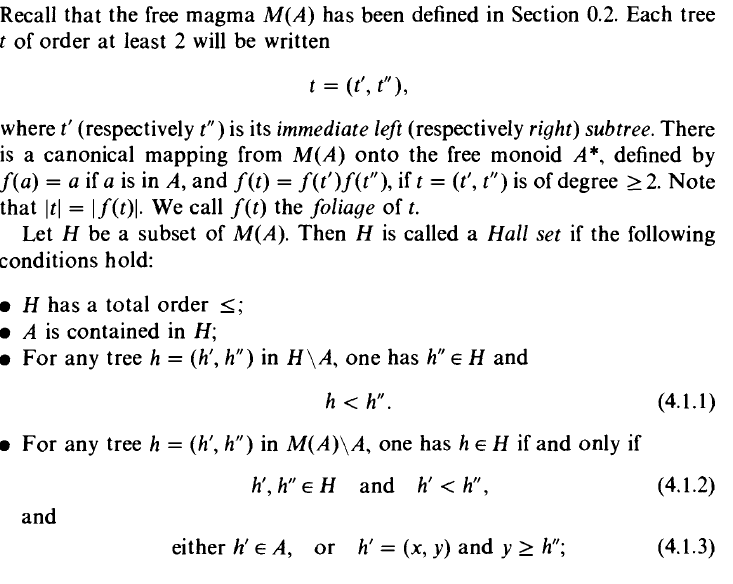

In [15]:
Image('hall_set.PNG')

#### Let's now fix a Hall set H in $M(A)$. We define a standard sequence of Hall trees to be a sequence 

$$s = (h_1, ..., h_n)$$

#### with $h_i \in H$ with $h_i$ being either a letter or $h_i = (h_{i'}, h_{i''})$ with

$$h_{i''} \geq h_{i+1}, ..., h_n$$

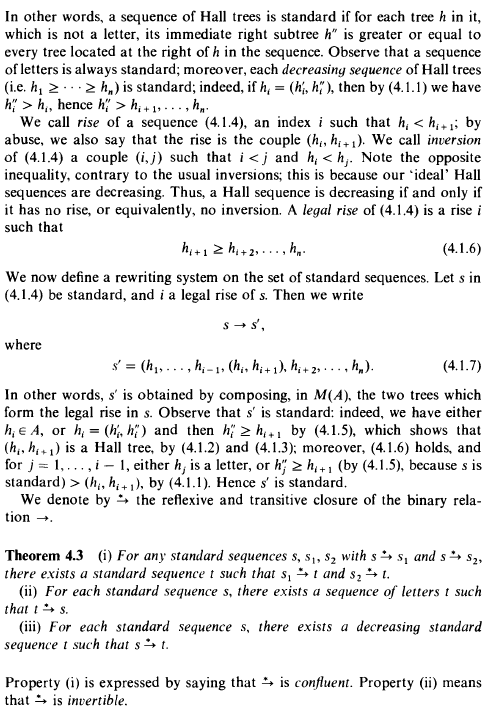

In [16]:
Image('standard_sequence.PNG')

## Theorem:

#### Each word w in $A^*$ has a unique factorization into a decresing product of hall trees:

$$w=f(h_1)...f(h_n), \ \ \ \ \ h_i \in H, \ h_1 \geq ... \geq h_n$$

#### We call foliage of the seqence $s=(h_1, ..., h_n)$ the word

$$f(s) = f(s_1)...f(s_n)$$

#### Observe that $s \overset{*}{\rightarrow}t$ implies that $f(s) = f(t)$

### Proof (useful to calculate hall basis in Terry's code):

#### Suppose we have a word $w=a_1...a_p$ for some letters $a_i$. Now consider the sequence $s=(a_1, ..., a_n)$. We know by the theorem above that there exists a decreasing sequence of Hall trees $t=(h_1,...,h_n)$ such that  $s \overset{*}{\rightarrow}t$. Furthermore  $s \overset{*}{\rightarrow}t$ implies that $f(s) = f(t)$. Hence the result.

#### We call Hall word the foliage of a Hall tree. 

### Corollary:

#### Each Hall word is the foliage of a unique Hall tree. 

#### Hence we can identify Hall words and Hall trees. Hence each word has a unique decreasing factorization into Hall words. 

### Hall and Poincare-Birkhoff-Witt bases

#### Fix a Hall set. We define for each Hall word $h$ a Lie polynomial $P_h$ in $\mathcal{L}(A)$ as follows:

#### If $a$ is a word then $P_a=a$
#### If $h$ is a Hall word of length $\geq 2$ with standard factorization $h'h''$, define $P_h = [P_{h'}, P_{h''}]$ 

#### $P_h$ is an homogeneous Lie polynomial of degree equal to the length of $h$. Plus $P_h$ has same partial degree with respect to each letter as $h$

### Important Remark:

#### In order to compute $P_h$ one has simply to interpret in the tree $t$ corresponding to $h$ each node as a Lie bracketing. We call the polynomials $P_h$ the Hall polynomials. These polynomials form a basis of the free Lie algebra.

### Reminder:

#### A module over a ring is a generalization of the notion of vector space over a field, wherein the corresponding scalars are the elements of an arbitrary given ring (with identity) and a multiplication (on the left and/or on the right) is defined between elements of the ring and elements of the module.

#### Thus, a module, like a vector space, is an additive abelian group; a product is defined between elements of the ring and elements of the module that is distributive over the addition operation of each parameter and is compatible with the ring multiplication.

## Theorem:

#### Recall that the free associative algebra $K<A>$ is a free K-module having the canonical basis $A^*$ (words)

#### 1) The Hall polynomials form a basis of the free Lie Algebra $\mathcal{L}(A)$

#### 2) The decreasing product of Hall polynomials 

$$P_{h_1}...P_{h_n}, \ \ \ h_i \in H, \ h_1 \geq ... \geq h_n$$

#### form a basis of the free associative algebra $K<A>$

### Remark:

#### This is a special application of the Poincare-Birkhoff-Witt theorem applied to the basis $(P_h)_{h \in H}$ of $\mathcal{L}(A)$:

#### If $L \ \ (= \mathcal{L}(A))$  is a Lie algebra over a field K, let $h \ \ (= \exp)$ denote the canonical K-linear map from L into the universal enveloping algebra $U(L) \ \ (=K<A>)$. Let  $X \ \ (=(P_h)_{h \in H})$  a totally ordered basis of L. A canonical monomial over X is a finite sequence $(x_1, x_2 ..., x_n)$ of elements of X which is non-decreasing ($x_1 \geq x_2 \geq ... \geq x_n$). Extend h to all canonical monomials as follows: If $(x_1, x_2 ..., x_n)$ is a canonical monomial, let

$$h(x_{1},x_{2}, ... ,x_{n})=h(x_{1})h(x_{2})...h(x_{n})$$

#### Then h is injective on the set of canonical monomials and its range is a basis of the K-vector space U(L).

### Recall:

#### A module over a ring is a generalization of the notion of vector space over a field, wherein the corresponding scalars are the elements of an arbitrary given ring (with identity) and a multiplication (on the left and/or on the right) is defined between elements of the ring and elements of the module.

#### A free K-module is a K-module with a basis

### Algorithm behind proof of (i) in the Theorem above:

#### Given a linear combination of trees $\sum \alpha_t t$ we aim at finding a linear combination of Hall trees $\sum \beta_h h$ such that

$$\sum \alpha_t t = \sum \beta_h h$$

#### If all trees in $\sum \alpha_t t$ are Hall

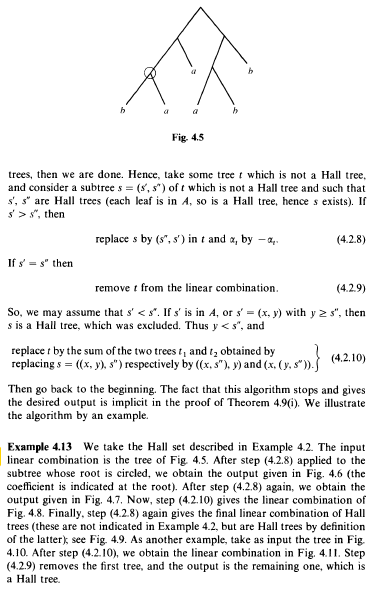

In [19]:
Image('hall_proof1.PNG')

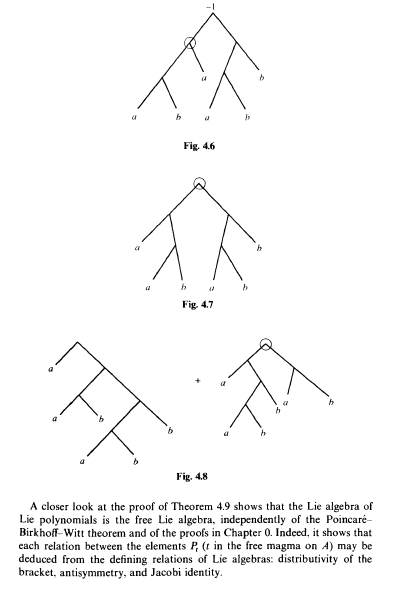

In [20]:
Image('hall_proof2.PNG')

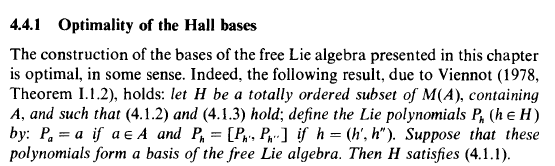

In [21]:
Image('remark_hall.PNG')

# Chapter 4: Lyndon words

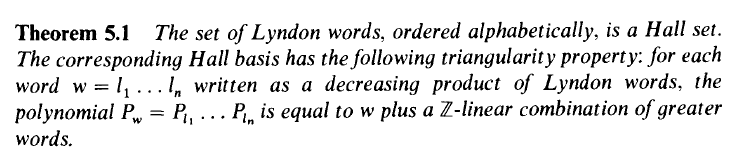

In [22]:
Image('lyndon_triangular.PNG')

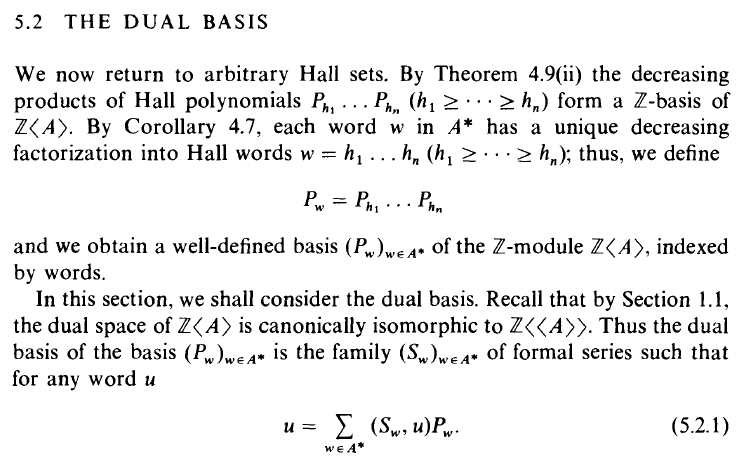

In [23]:
Image('dual_basis_PBW1.PNG')

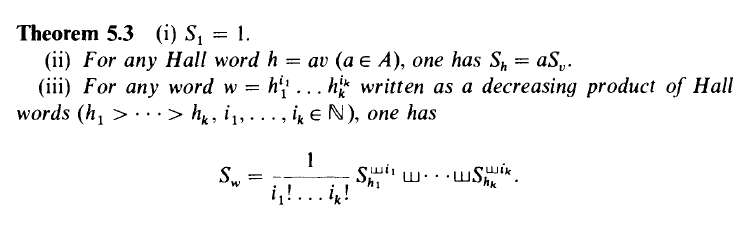

In [24]:
Image('dual_basis_PBW2.PNG')

In [27]:
# let's fix a Hall basis
H = HallBasis(2, 12, lessExpressionStandardHall)

# let's fix a word
w = '1122'

In [28]:
# express w in the PBW basis
P(w, H)

E[{}, {}, {}, {}, {1122: 1, 1212: -2, 1221: 1}]

In [29]:
# express w in the dual basis
S(w, H)

E[{}, {}, {}, {}, {1122: 2.0, 1212: 1.0, 1221: 1.0}]

In [34]:
# check duality
list_of_words = [w] + ['1212']

for i in range(len(list_of_words)):
    for j in range(len(list_of_words)):
        print('(S_{}, P_{}) = {}'.format(list_of_words[i], list_of_words[j], dotprod(P(list_of_words[i], H), S(list_of_words[j], H))))

(S_1122, P_1122) = 1.0
(S_1122, P_1212) = 0.0
(S_1212, P_1122) = 0.0
(S_1212, P_1212) = 1.0


# Chapter 5: Shuffle algebra and subwords

# Chapter 6: Circular words